<center><h1> ------------ | CLASSIFYING CAT BREEDS PRE-PROCESSING | ------------<br></h1></center>
<center>Sara Haman</center>
<center>_________________________________________________________</center>

In this file I will do all the pre-processing on the data (i.e., labeling, standardization, etc.) and pickle it, so that it can be loaded into the other notebooks with minimal repeated code. 

In [1]:
###########################
######   LIBRARIES   ######
###########################

###### STANDARD ######
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import cv2
import os

###### SKLEARN MODULES ######
import scipy.io
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

###### IMAGE DISPLAY ######
from PIL import Image
from IPython.core.display import HTML 
from mpl_toolkits.axes_grid1 import ImageGrid


<center><h2>| Reading in the Images |</h2></center>  
First, we need to get the data into Python and label it. 

In [4]:
len(data)

3132

In [2]:

image_files = glob('./data/images/*.jpg')

classes = set()
data = []
labels = []
dim = (250, 250)

for file in image_files:
    breed_name = file.rsplit("\\", 1)[1].rsplit("_", 1)[0]
    classes.add(breed_name)
    img = cv2.imread(file)
    try:
        img = cv2.resize(img,(250,250))
        data.append(img)
        labels.append(breed_name)
    except:
        print("COULD NOT READ:", file)
    

COULD NOT READ: ./data/images\Abyssinian_34.jpg
COULD NOT READ: ./data/images\Egyptian_Mau_139.jpg
COULD NOT READ: ./data/images\Egyptian_Mau_145.jpg
COULD NOT READ: ./data/images\Egyptian_Mau_167.jpg
COULD NOT READ: ./data/images\Egyptian_Mau_177.jpg
COULD NOT READ: ./data/images\Egyptian_Mau_191.jpg


<h3><center>Inspecting the Images</center></h3>

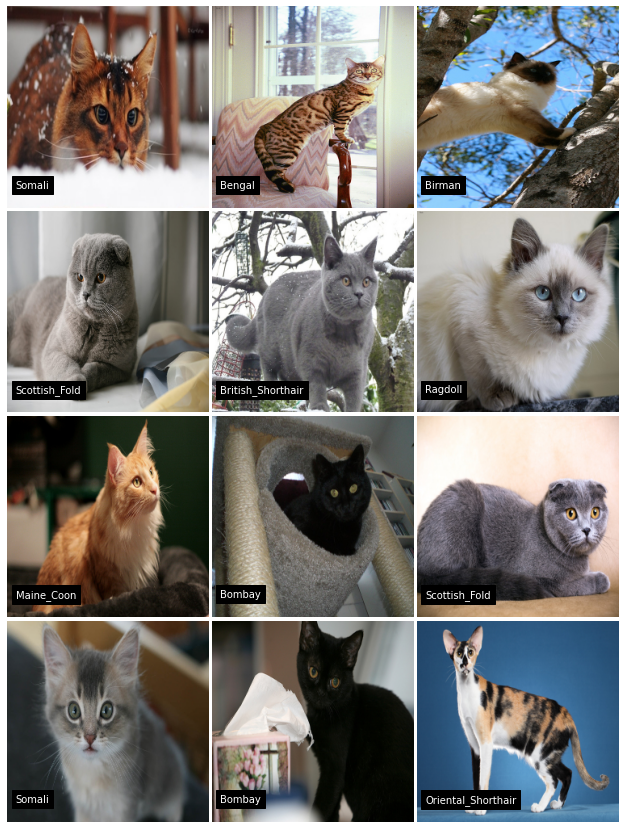

In [39]:

fig = plt.figure(1, figsize=(15, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 3), axes_pad=0.05)

for i, index in enumerate(np.random.choice(range(len(data)), 12)):
    file = data[index]
    image = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
    label = labels[index]
    ax = grid[i]
    ax.imshow(image)
    ax.text(10, 225, label, color='w', backgroundcolor='k')
    ax.axis(False)

plt.show()

Breed Frequencies

<AxesSubplot:>

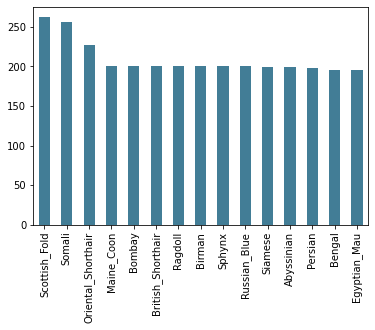

In [40]:
freq_df = pd.DataFrame({'freq': labels})
fig, ax = plt.subplots()
freq_df['freq'].value_counts().plot(ax=ax, kind='bar', facecolor = ('#427d96'))


Creating the train/test split, which will be used across all of the networks

In [41]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size = 0.3, random_state=1, stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=2, stratify = y_temp)

In [44]:
splits = ["train", "validation", "test"]
image_splits = [X_train, X_val, X_test]
label_splits = [y_train, y_val, y_test]
wd = os.getcwd()

for (split, imgs, labels) in zip(splits, image_splits, label_splits):  
  
    counts = {}
    
    for (i,(img, label)) in enumerate(zip(imgs, labels)):
        if label not in counts.keys():
            counts[label] = 0
        else:
            counts[label] += 1
        
        import os
        
        path = os.path.join(wd,'data', split, label)
        cv2.imwrite('{}/{}.jpg'.format(path, counts[label]), img)
        